In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import backend as K
import numpy as np
import os
import sys
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
from vivit import run_experiment, test_files, classes
from data import get_video_label, VideoDataGenerator, labels_df, files, labels, num_to_label
from synthetic import *
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import numpy as np
import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline
import pandas as pd
sns.set(style="darkgrid", palette="tab10")

In [7]:
def make_eval_plots(file):
    # clear output
    clear_output()
    performance = pd.read_csv(file)
    acc = performance[["accuracy", "val_accuracy"]]
    top_5_acc = performance[["top-5-accuracy", "val_top-5-accuracy"]]
    loss = performance[["loss", "val_loss"]]
    _, axs = plt.subplots(1, 3, figsize=(18, 6))
    Epochs = len(acc)
    # Plot 1: Accuracy
    sns.lineplot(data=acc, x=acc.index, y="accuracy", ax=axs[0], label="accuracy")
    sns.lineplot(data=acc, x=acc.index, y="val_accuracy", ax=axs[0], label="val_accuracy")
    axs[0].hlines(0.1, 0, Epochs-1, colors="red", linestyles="dashed", label="Chance Accuracy")
    axs[0].set_title(f"Accuracy | {Epochs=}")
    axs[0].set_xlabel("Epoch")
    val_last = acc["val_accuracy"].iloc[-1]
    axs[0].text(Epochs-1, val_last-0.05, f'{val_last:.2f}', 
         color='black', fontsize=12, style='italic', 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.6))
    # Plot 2: Top 5 Accuracy
    sns.lineplot(data=top_5_acc, x=top_5_acc.index, y="top-5-accuracy", ax=axs[1], label="top-5-accuracy")
    sns.lineplot(data=top_5_acc, x=top_5_acc.index, y="val_top-5-accuracy", ax=axs[1], label="val_top-5-accuracy")
    val_last = top_5_acc["val_top-5-accuracy"].iloc[-1]
    axs[1].text(Epochs-1, val_last-0.05, f'{val_last:.2f}', 
         color='black', fontsize=12, style='italic', 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.6))
    axs[1].hlines(0.5, 0, Epochs-1, colors="red", linestyles="dashed", label="Chance Top 5 Accuracy")
    axs[1].set_title(f"Top 5 Accuracy | {Epochs=}")
    axs[1].set_xlabel("Epoch")
    # Plot 3: Loss
    sns.lineplot(data=loss, x=loss.index, y="loss", ax=axs[2], label="loss")
    sns.lineplot(data=loss, x=loss.index, y="val_loss", ax=axs[2], label="val_loss")
    val_last = loss["val_loss"].iloc[-1]
    axs[2].text(Epochs-1, val_last-0.05, f'{val_last:.2f}', 
         color='black', fontsize=12, style='italic', 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.6))
    axs[2].hlines(2.3025, 0, Epochs-1, colors="red", linestyles="dashed", label="Chance Loss")
    axs[2].set_title(f"Sparse Cross Entropy Loss | {Epochs=}")
    axs[2].set_xlabel("Epoch")
    plt.legend()
    # Adjust layout
    plt.tight_layout()
    plt.savefig("../models/eval_plots.png")
    plt.show()
# listeniner to see if file has changed and call function if it has
def file_listener(file, func):
    func(file);
    last_modified = os.path.getmtime(file)
    while True:
        if os.path.getmtime(file) != last_modified:
            last_modified = os.path.getmtime(file)
            func(file);

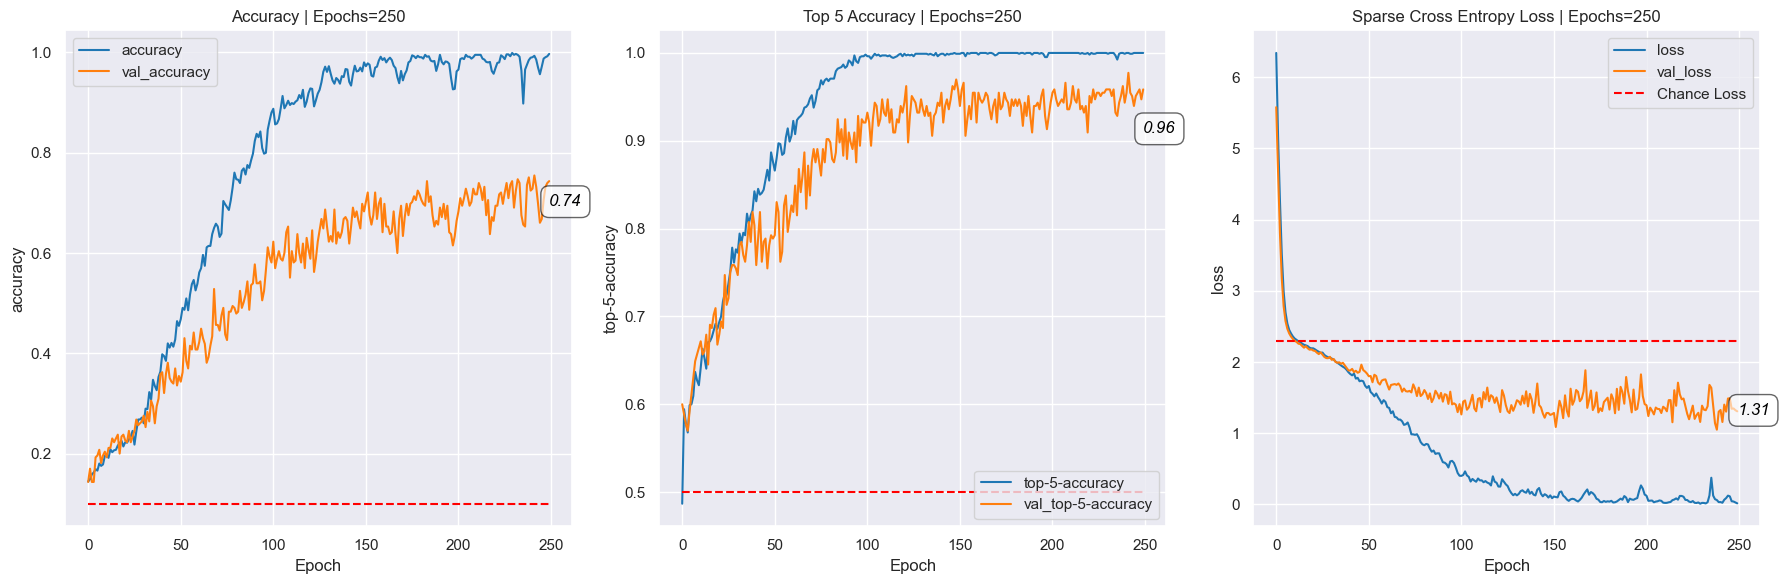

KeyboardInterrupt: 

In [8]:
file_listener("../models/high-epoch-no-decay.csv", make_eval_plots)